In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
def timeSequence(sampleRate, timeDuration, timeIncrement):
    samplesNumber = sampleRate * timeDuration
    return np.arange(samplesNumber) * timeIncrement
#enddef

In [18]:
from random import randint

def sineWave(amplitude, frequency, timeSequence):
    phaseOffset = randint(1, 5)
    omega = (2 * np.pi) * frequency
    return np.sin((omega * timeSequence) + phaseOffset) * amplitude
#enddef

In [19]:
#Default Parameters for time sequence
sampleRate = 44100 #samples in a second
timeDuration = 0.1 #total seconds
timeIncrement = 1 / sampleRate #time increment (duration of a sample)
amplitude = 1

#Default time axis
time = timeSequence(sampleRate, timeDuration, timeIncrement)

trainArrayLF = []
trainArrayHF = []

In [20]:
def generateSineWaves(startFreq, endFreq, sineArray):
    step = randint(3, 7)
    for i in range(startFreq, endFreq, step):
        sineArray.append(sineWave(amplitude, i, time))
        step = randint(3, 7)
#enddef

In [21]:
generateSineWaves(100, 3000, trainArrayLF)
generateSineWaves(5000, 7900, trainArrayHF)

print(len(trainArrayLF))
print(len(trainArrayHF))

trainVectorLF = np.zeros((len(trainArrayLF), 1))
trainVectorHF = np.ones((len(trainArrayHF), 1))

967
484


In [22]:
def addNoise(sineArray, noiseArray):
    for i in range (0, len(sineArray), 1):
        for j in range (0, len(sineArray[i]), 1):
            sineArray[i][j] = sineArray[i][j] + noiseArray[j]
#enddef

noiseArray = np.random.normal(0,0.15, 4410)

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4410, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(441, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(220, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=1e-08), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
trainArrayLF.extend(trainArrayHF)
trainArray = np.asarray(trainArrayLF)
trainVector = np.append(trainVectorLF, trainVectorHF, axis=0)

print(trainArray.shape)
print(trainVector.shape)

(1451, 4410)
(1451, 1)


In [25]:
#model.fit(trainArray, trainVector, epochs=500)

loaded_model = tf.keras.models.load_model('sine_waves_random_step.model')

In [26]:
def generateOneStep(startFreq, endFreq, sineArray):
    for i in range(startFreq, endFreq, 1):
        sineArray.append(sineWave(amplitude, i, time))
#enddef

testArrayLF = []
generateOneStep(1800, 2300, testArrayLF)
addNoise(testArrayLF, noiseArray)
testArrayLFNP = np.asarray(testArrayLF)

In [29]:
randomFreq = loaded_model.predict([testArrayLFNP])

startFreq=1800
for freq in randomFreq:
    print('Prediction for ', startFreq, 'Hz :', freq, '\n')
    startFreq=startFreq+1

Prediction for  1800 Hz : [0.38188562] 

Prediction for  1801 Hz : [0.6648686] 

Prediction for  1802 Hz : [0.09532852] 

Prediction for  1803 Hz : [0.18947104] 

Prediction for  1804 Hz : [0.00402426] 

Prediction for  1805 Hz : [0.02593157] 

Prediction for  1806 Hz : [0.00253894] 

Prediction for  1807 Hz : [0.00519552] 

Prediction for  1808 Hz : [0.00174988] 

Prediction for  1809 Hz : [0.00375067] 

Prediction for  1810 Hz : [0.01436944] 

Prediction for  1811 Hz : [0.03128653] 

Prediction for  1812 Hz : [0.06494342] 

Prediction for  1813 Hz : [0.00445658] 

Prediction for  1814 Hz : [0.03037947] 

Prediction for  1815 Hz : [0.10927377] 

Prediction for  1816 Hz : [0.14594081] 

Prediction for  1817 Hz : [0.22198084] 

Prediction for  1818 Hz : [0.00355239] 

Prediction for  1819 Hz : [0.09373996] 

Prediction for  1820 Hz : [0.1146597] 

Prediction for  1821 Hz : [0.04730153] 

Prediction for  1822 Hz : [0.00828472] 

Prediction for  1823 Hz : [0.09131584] 

Prediction for  18

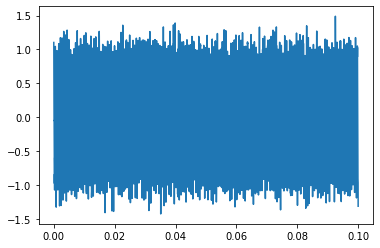

In [30]:
plt.plot(time, testArrayLFNP[5])

In [31]:
testArrayHF = []
generateOneStep(6200, 7300, testArrayHF)
addNoise(testArrayHF, noiseArray)
testArrayHFNP = np.asarray(testArrayHF)

In [33]:
randomHFreq = loaded_model.predict([testArrayHFNP])

startHFreq=6200
for freq in randomHFreq:
    print('Prediction for ', startHFreq, 'Hz :', freq, '\n')
    startHFreq=startHFreq+1

Prediction for  6200 Hz : [0.36245435] 

Prediction for  6201 Hz : [0.631131] 

Prediction for  6202 Hz : [0.29706514] 

Prediction for  6203 Hz : [0.0925163] 

Prediction for  6204 Hz : [0.91198057] 

Prediction for  6205 Hz : [0.08727369] 

Prediction for  6206 Hz : [0.00135239] 

Prediction for  6207 Hz : [0.9398575] 

Prediction for  6208 Hz : [0.9966017] 

Prediction for  6209 Hz : [0.00175459] 

Prediction for  6210 Hz : [0.8135172] 

Prediction for  6211 Hz : [0.94650435] 

Prediction for  6212 Hz : [0.05160157] 

Prediction for  6213 Hz : [0.21944204] 

Prediction for  6214 Hz : [0.22290559] 

Prediction for  6215 Hz : [0.01126928] 

Prediction for  6216 Hz : [0.979411] 

Prediction for  6217 Hz : [0.09430709] 

Prediction for  6218 Hz : [0.9943954] 

Prediction for  6219 Hz : [0.29929712] 

Prediction for  6220 Hz : [0.00720863] 

Prediction for  6221 Hz : [0.9519406] 

Prediction for  6222 Hz : [0.9916768] 

Prediction for  6223 Hz : [0.87700105] 

Prediction for  6224 Hz : [

Prediction for  6735 Hz : [0.02335133] 

Prediction for  6736 Hz : [0.06200452] 

Prediction for  6737 Hz : [0.76019424] 

Prediction for  6738 Hz : [0.00591622] 

Prediction for  6739 Hz : [0.001675] 

Prediction for  6740 Hz : [0.8870025] 

Prediction for  6741 Hz : [0.05558928] 

Prediction for  6742 Hz : [0.13141505] 

Prediction for  6743 Hz : [0.2185643] 

Prediction for  6744 Hz : [0.09096613] 

Prediction for  6745 Hz : [0.20025621] 

Prediction for  6746 Hz : [0.95566297] 

Prediction for  6747 Hz : [0.9625031] 

Prediction for  6748 Hz : [0.15650083] 

Prediction for  6749 Hz : [0.89894146] 

Prediction for  6750 Hz : [0.01749558] 

Prediction for  6751 Hz : [0.7004108] 

Prediction for  6752 Hz : [0.13631918] 

Prediction for  6753 Hz : [0.7575647] 

Prediction for  6754 Hz : [0.17547423] 

Prediction for  6755 Hz : [0.9476357] 

Prediction for  6756 Hz : [0.9879098] 

Prediction for  6757 Hz : [0.8397057] 

Prediction for  6758 Hz : [0.05902162] 

Prediction for  6759 Hz : 

Prediction for  7251 Hz : [0.5849375] 

Prediction for  7252 Hz : [0.930816] 

Prediction for  7253 Hz : [0.86487067] 

Prediction for  7254 Hz : [0.68475103] 

Prediction for  7255 Hz : [0.1302294] 

Prediction for  7256 Hz : [0.33878908] 

Prediction for  7257 Hz : [0.78195935] 

Prediction for  7258 Hz : [0.8453524] 

Prediction for  7259 Hz : [0.98723304] 

Prediction for  7260 Hz : [0.2122128] 

Prediction for  7261 Hz : [0.10448207] 

Prediction for  7262 Hz : [0.35623902] 

Prediction for  7263 Hz : [0.01457682] 

Prediction for  7264 Hz : [0.01199415] 

Prediction for  7265 Hz : [0.14898553] 

Prediction for  7266 Hz : [0.00864179] 

Prediction for  7267 Hz : [0.11474424] 

Prediction for  7268 Hz : [0.054908] 

Prediction for  7269 Hz : [0.9130367] 

Prediction for  7270 Hz : [0.93196553] 

Prediction for  7271 Hz : [0.22885935] 

Prediction for  7272 Hz : [0.9996203] 

Prediction for  7273 Hz : [0.95462924] 

Prediction for  7274 Hz : [0.09943926] 

Prediction for  7275 Hz : 